<a href="https://colab.research.google.com/github/joangog/object-detection/blob/main/coco2017_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model performance analysis on COCO 2017 dataset

The following models will be evaluated:

| Model | Backbone | Image Size | Parameters | GFLOPS 
| --- | --- | --- | --- | --- |
| SSD300 | VGG16 | 300x300 | 35.6M | 69.8 |
| SSDlite320 | MobileNetV3-Large | 320x320 | 3.4M | 1.2 |
| Faster R-CNN |  ResNet-50 FPN || 41.8M |  |
| Faster R-CNN |  MobileNetV3-Large FPN || 19.4M |  |
| Mask R-CNN |  ResNet-50 FPN || 44.4M | |
| YOLOv5s |  Custom | 640x640 | 7.3M | 17 |
| YOLOv5m |  Custom | 640x640 | 21.4M | 51.3 |
| YOLOv5l |  Custom |640x640 | 47M | 115.5 |
| YOLOv3 |  Darknet53 | 640x640 | 70M | 156.3 |
| YOLOv3-tiny |  Darknet53 | 640x640 | 8.8M | 13.3 |
| YOLOv3-spp |  Darknet53 | 640x640 | 63M | 157.1 |


### Import packages

In [4]:
from google.colab import drive

import os

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Gather evaluation results

In [5]:
# Mount GDrive directory
drive.mount('/content/drive')
results_dir = '/content/drive/MyDrive/object-detection-outputs/coco2017'
results_files = os.listdir(results_dir)
results_files = [file for file in results_files if ('.csv' in file) and ('coco17' in file)]

print('Files found:')

results = pd.DataFrame(columns=['model', 'model_params', 'fps', 'iou_type', 'metric', 'iou', 'area', 'max_dets', 'score'])
for file in results_files:
  print(f'\t{file}')
  file_path = os.path.join(results_dir,file)
  results = results.append(pd.read_csv(file_path))
results = results.reset_index().iloc[:,1:-1]  # Drop uneeded columns
results = results.sort_values(['model'])

print('\n')
results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files found:
	coco17_yolov3_spp_results.csv
	coco17_ssdlite320_mobilenet_v3_large_results.csv
	coco17_ssd300_vgg16_results.csv
	coco17_fasterrcnn_resnet50_fpn_results.csv
	coco17_maskrcnn_resnet50_fpn_results.csv
	coco17_fasterrcnn_mobilenet_v3_large_fpn_results.csv
	coco17_yolov5s_results.csv
	coco17_yolov5m_results.csv
	coco17_yolov3_results.csv
	coco17_yolov5l_results.csv
	coco17_yolov3_tiny_results.csv




,model,model_params,fps,iou_type,metric,iou,area,max_dets,score
83,Faster R-CNN MobileNetV3-Large FPN,19386354,11.363935,bbox,avg_recall,0.50:0.95,large,100,0.644887
81,Faster R-CNN MobileNetV3-Large FPN,19386354,11.363935,bbox,avg_recall,0.50:0.95,small,100,0.197150
80,Faster R-CNN MobileNetV3-Large FPN,19386354,11.363935,bbox,avg_recall,0.50:0.95,all,100,0.442988
79,Faster R-CNN MobileNetV3-Large FPN,19386354,11.363935,bbox,avg_recall,0.50:0.95,all,10,0.425411
78,Faster R-CNN MobileNetV3-Large FPN,19386354,11.363935,bbox,avg_recall,0.50:0.95,all,1,0.282852
...,...,...,...,...,...,...,...,...,...
93,YOLOv5s,7266973,40.247661,bbox,avg_recall,0.50:0.95,small,100,0.179590
94,YOLOv5s,7266973,40.247661,bbox,avg_recall,0.50:0.95,medium,100,0.429506
84,YOLOv5s,7266973,40.247661,bbox,avg_precision,0.50:0.95,all,100,0.313017
91,YOLOv5s,7266973,40.247661,bbox,avg_recall,0.50:0.95,all,10,0.367127


### Plot  fps/mAP graph (max detections = 100)

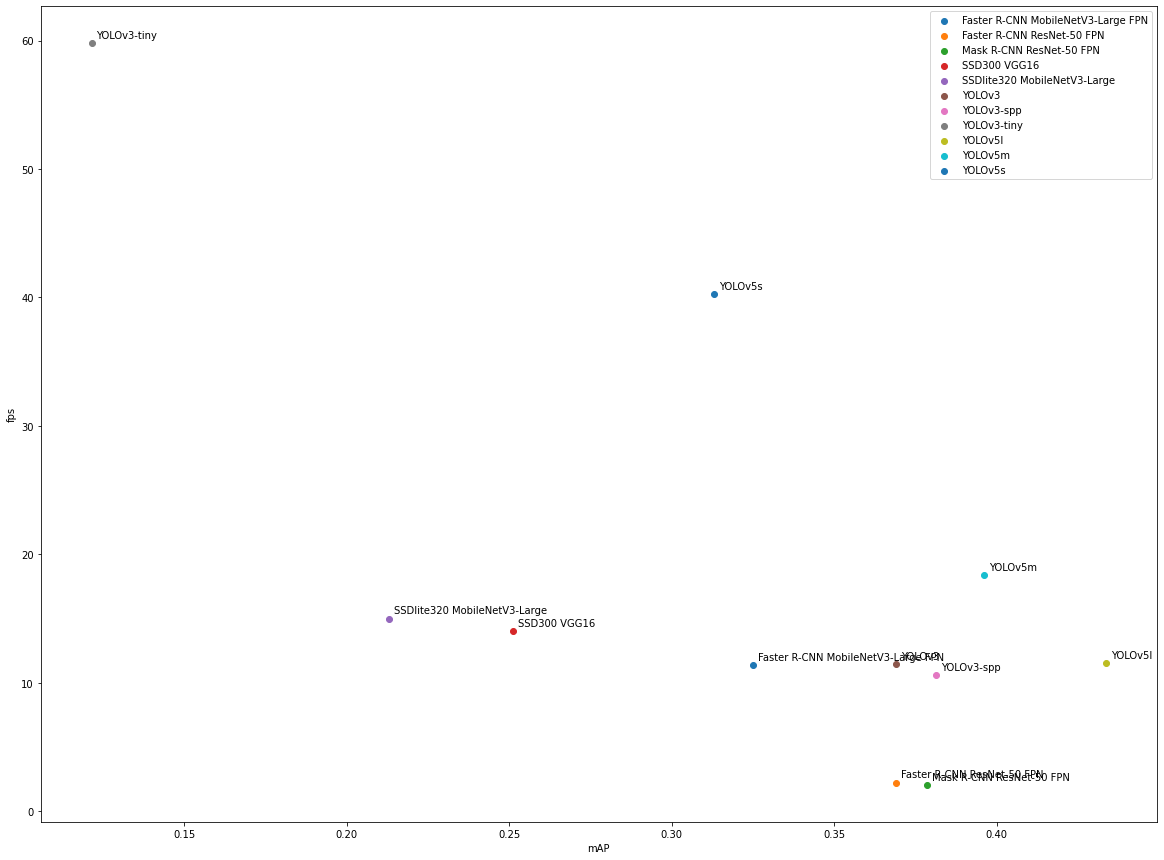

In [6]:
models = results.model.unique()

plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_precision') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]

fps = plot_data['fps'].values
mAP = plot_data['score'].values

plt.figure(figsize=(20,15))

plt.xlabel('mAP')
plt.ylabel('fps')

for i, model in enumerate(models):
    plt.annotate(model, (mAP[i], fps[i]), xytext=(5, 5), textcoords='offset points')
    plt.scatter(mAP[i],fps[i])

plt.legend(models, scatterpoints=1)

plt.show()

### Plot  fps/F1 graph (max detections = 100)

[0.3773083909591744, 0.42777814252297397, 0.43753802367890826, 0.2974040585052621, 0.26013002684196734, 0.39907270953692886, 0.41059084760135384, 0.13435798314728126, 0.4630869858514664, 0.42366622183419783, 0.33818121194189205]


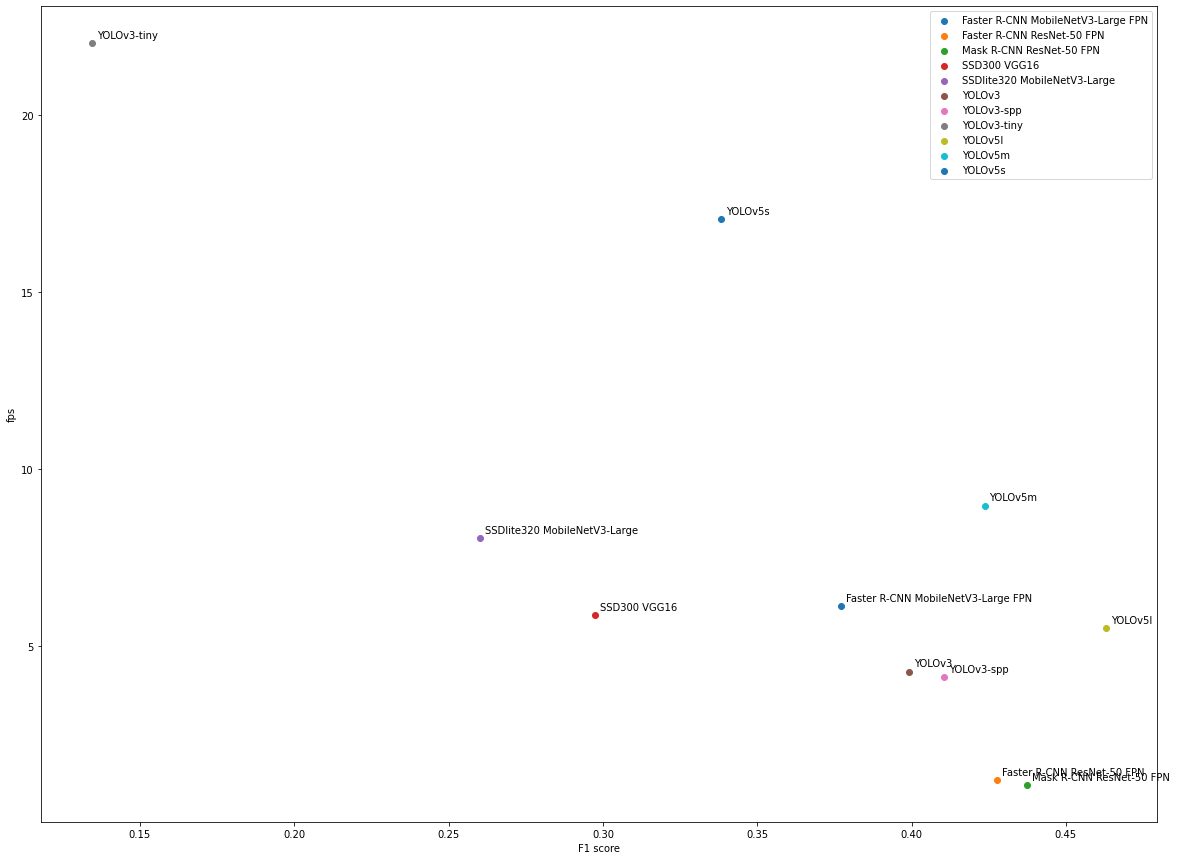

In [ ]:
models = results.model.unique()

precision_plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_precision') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]
recall_plot_data = results[
              (results['iou_type'] == 'bbox') &
              (results['metric'] == 'avg_recall') & 
              (results['iou'] == '0.50:0.95') &
              (results['area'] == 'all') &
              (results['max_dets'] == 100)
              ]

time = precision_plot_data['model_time'].values
fps = 1.0 / time

precision = precision_plot_data['score'].values
recall = recall_plot_data['score'].values
f1 = [2*((precision[i]*recall[i])/(precision[i]+recall[i])) for i in range(0,len(precision))]
print(f1)

plt.figure(figsize=(20,15))

plt.xlabel('F1 score')
plt.ylabel('fps')

for i, model in enumerate(models):
    plt.annotate(model, (f1[i], fps[i]), xytext=(5, 5), textcoords='offset points')
    plt.scatter(f1[i],fps[i])

plt.legend(models, scatterpoints=1)

plt.show()